# GloVe Vectors

Downloaded Golve Vectors from here : https://nlp.stanford.edu/projects/glove/

* **GloVe Vectors(Global Vectors)** is an unsupervised learning algorithm for obtaining vector representations for words. It shows the similarities and differences between words as a vector representation.

## Table of Contents

* [Load Data](#load)
* [Word Cloud on Spam Data](#wc_spam)
* [Word Cloud on Ham Data](#wc_ham)
* [Data Splitting](#split)
* [Data Cleaning](#clean)
* [Tokenizing and Sequencing](#token)
* [GloVe Vectors Representation](#glove)
* [Model Creation](#model)
* [Load and Evaluate Model](#load_eval)
* [Predicting New Data](#pred)

In [1]:
import numpy as np
import pandas as pd

<a id="load"></a>
### Load Data

In [2]:
df = pd.read_csv('datasets/spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)
df.columns = ['sentiment','review']
df.head()

,sentiment,review
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['spam'] = pd.get_dummies(df['sentiment'],drop_first=True)
df.head()

,sentiment,review,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.drop(columns = ['sentiment'], inplace=True)
df.head() 
# 0 for ham and 1 for spam

,review,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df.isnull().sum()

review    0
spam      0
dtype: int64

In [12]:
df['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

<a id="wc_spam"></a>
### Word Cloud on Spam Data

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
from wordcloud import WordCloud

In [33]:
def generate_wordcloud(df, label):
    filt = df['spam'] == label
    text = " ".join(df.loc[filt].review.tolist())
    wordcloud = WordCloud(width=1920, height=1080).generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    
    label_class="ham"
    if label:
        label_class = "Spam"
    plt.title('Word Cloud Visualisation for {} data'.format(label_class))
    
    plt.axis('off')
    plt.show()

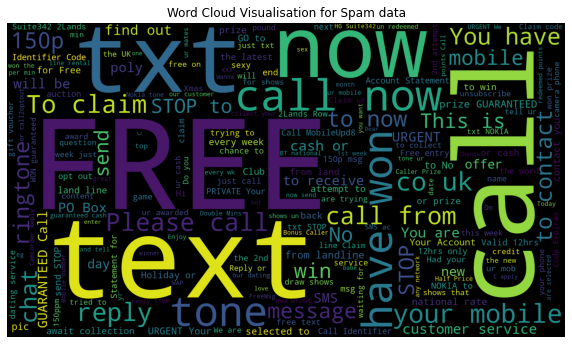

In [34]:
generate_wordcloud(df, 1)

<a id="wc_ham"></a>
### Word Cloud on Ham Data

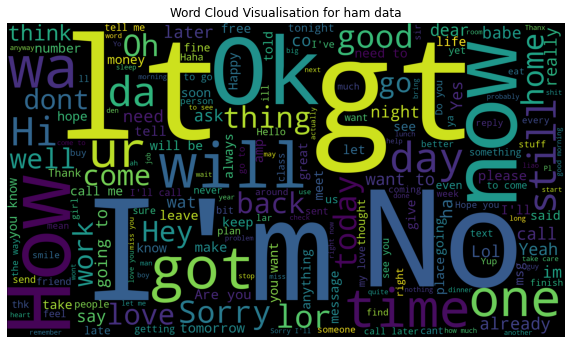

In [35]:
generate_wordcloud(df, 0)

<a id="split"></a>
### Data Splitting

In [14]:
x = df.review
y = df.spam

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, shuffle=False)

In [19]:
x_train.shape, x_test.shape

((4457,), (1115,))

In [23]:
y_train.value_counts()

0    3876
1     581
Name: spam, dtype: int64

In [24]:
y_test.value_counts()

0    949
1    166
Name: spam, dtype: int64

<a id="clean"></a>
### Data Cleaning

In [25]:
import contractions as cont # to fix the contractions we use this library

print(cont.fix("u"))
print(cont.fix("i'd"))
print(cont.fix("we'll've"))

you
I would
we will have


In [36]:
from bs4 import BeautifulSoup
import re
import unicodedata
import contractions as cont # to fix the contractions we use this library

def DataCleaner(x):
    x = BeautifulSoup(x, 'html.parser').get_text() # remove html tags
    x = re.sub(r'(http|ftp|https)\S+\s*', '', x)  # remove URLs
    x = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x) # remove Emails
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore') # remove Accented Text
    x = " ".join([cont.fix(word.lower()) for word in x.split()]) # we expand the contraction of words
    x = re.sub('[^a-zA-Z0-9]+', ' ', x) # here we replace all with a space character except for alphaNumericals.
    x = " ".join([word.lower() for word in x.split()])  # remove extra whitespace around the words.
    return x

# we haven't removed the stop words here because glove vectors also contain vector representation for the stop words

In [39]:
# train data without cleaning
x_train.head()

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... �� v ma fan...
3320                               Yo im right by yo work
Name: review, dtype: object

In [40]:
## Data Cleaning on Train Data

x_train = x_train.apply(lambda x: DataCleaner(x))
x_train.head()

1114    no no this is kallis home ground amla home tow...
3589    i am in escape theatre now going to watch kava...
3095    we walked from my moms right on stagwood pass ...
1012                i dunno they close oredi not v ma fan
3320                             yo i am right by yo work
Name: review, dtype: object

In [41]:
# test data without cleaning
x_test.head()

4456    Aight should I just plan to come up later toni...
690                                    Was the farm open?
944     I sent my scores to sophas and i had to do sec...
3768    Was gr8 to see that message. So when r u leavi...
1189    In that case I guess I'll see you at campus lodge
Name: review, dtype: object

In [42]:
## Data Cleaning on Test Data

x_test = x_test.apply(lambda x: DataCleaner(x))
x_test.head()

4456    aight should i just plan to come up later tonight
690                                     was the farm open
944     i sent my scores to sophas and i had to do sec...
3768    was gr8 to see that message so when r you leav...
1189    in that case i guess i will see you at campus ...
Name: review, dtype: object

<a id="token"></a>
### Tokenizing and Sequencing

In [46]:
# make the list of x_train data points

train_text = x_train.tolist()
train_text[:3]

['no no this is kallis home ground amla home town is durban',
 'i am in escape theatre now going to watch kavalan in a few minutes',
 'we walked from my moms right on stagwood pass right on winterstone left on victors hill address is']

In [47]:
# make the list of x_train data points

test_text = x_test.tolist()
test_text[:3]

['aight should i just plan to come up later tonight',
 'was the farm open',
 'i sent my scores to sophas and i had to do secondary application for a few schools i think if you are thinking of applying do a research on cost also contact joke ogunrinde her school is one me the less expensive ones']

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
token = Tokenizer()
token.fit_on_texts(train_text)

In [49]:
vocab_size = len(token.word_index)+1
vocab_size

7553

In [50]:
#token.index_word

In [55]:
## make texts to sequences on train data

x_train_seq = token.texts_to_sequences(train_text)

In [56]:
## make texts to sequences on test data

x_test_seq = token.texts_to_sequences(test_text)

In [57]:
# getting maximum sentence length and its position 

max_length = 0
max_ind = 0
for i, arr in enumerate(x_train_seq):
    if max_length < len(arr):
        max_length = len(arr)
        max_ind = i
print("maximum array length {} and it is present at index of {}".format(max_length, max_ind))

maximum array length 190 and it is present at index of 158


In [23]:
## it shows an array of maximum length 
#x_train_seq[max_ind]

In [54]:
max_len = max_length + 10  # just adding extra length to get round figure of 200
max_len

200

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
## pad sequences on train data

x_train_pad_seq = pad_sequences(x_train_seq, maxlen = max_len, padding = 'pre')
x_train_pad_seq.shape

(4457, 200)

In [60]:
## pad sequences on test data

x_test_pad_seq = pad_sequences(x_test_seq, maxlen = max_len, padding = 'pre')
x_test_pad_seq.shape

(1115, 200)

<a id="glove"></a>
### GloVe Vectors Representation

In [62]:
glove_vectors = dict()

In [63]:
### Make a dictionary of glove vectors.

file = open('C:\\Users\\91939\\Desktop\\ALL PYTHON LIBRARY PROJECTS\\NLP projects\\Deep Learning Projects\\Glove Vectors\\glove.6B.200d.txt', encoding = 'utf-8')

for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()

In [64]:
keys = glove_vectors.keys()
list(keys)[:15]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is']

In [65]:
len(glove_vectors.keys())

400000

In [66]:
glove_vectors.get('you').shape

(200,)

* Checking for other words as it returns None value

In [67]:
a =glove_vectors.get('asciii')
print(a)

None


In [68]:
word_vector_matrix = np.zeros(shape=(vocab_size, max_len))   
print(word_vector_matrix.shape)

(7553, 200)


In [69]:
## make a list of unmatched words

unMatched_words = []
for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        unMatched_words.append(word)

In [70]:
print("{} words present in the dataset that are not matched with glove vectors.".format(len(unMatched_words)))
unMatched_words[:10]

1694 words present in the dataset that are not matched with glove vectors.


['150p',
 'thanx',
 '150ppm',
 'aight',
 '8007',
 'chikku',
 '86688',
 'mobileupd8',
 'suite342',
 '2lands']

In [72]:
word_vector_matrix[1]  ## these are the pretained-weights that can be used for our model building. 

array([ 0.85395  ,  0.57146  , -0.023652 , -0.11047  , -0.1275   ,
        0.085129 , -0.74976  , -0.068121 ,  0.043576 ,  0.63928  ,
       -0.072301 ,  0.28775  ,  0.66309  ,  0.23428  , -0.080206 ,
        0.27575  , -0.30429  ,  0.36573  ,  0.14379  , -0.107    ,
        0.33497  ,  3.0789   ,  0.059451 ,  0.039004 ,  0.45507  ,
       -0.47595  , -0.10247  ,  0.28632  , -0.31317  , -0.053495 ,
       -0.1799   , -0.075404 ,  0.11216  , -0.098163 , -0.10058  ,
       -0.33414  , -0.52159  , -0.17538  ,  0.008864 ,  0.30078  ,
        0.083636 ,  0.38333  , -0.12608  ,  0.47973  , -0.33916  ,
        0.34158  ,  1.0214   , -0.15934  ,  0.09167  ,  0.42668  ,
        0.30747  , -0.10632  ,  0.051894 ,  0.49205  ,  0.48486  ,
        0.026916 ,  0.091038 , -0.30984  , -0.129    ,  0.14039  ,
        0.093296 , -0.057087 , -0.058724 , -0.27043  , -0.36084  ,
       -0.11826  , -0.013159 ,  0.6766   ,  0.56496  ,  0.10306  ,
        0.89588  , -0.083035 ,  0.20385  , -0.31218  , -0.7853

In [73]:
word_vector_matrix.shape

(7553, 200)

<a id="model"></a>
### Model Creation

In [74]:
vec_size=200 # changing each word into a vector of size 200

In [75]:
## we set the seed so that we receive the same random weights at each time we train the program
import tensorflow as tf
tf.random.set_seed(1)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [77]:
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length = max_len, weights = [word_vector_matrix], trainable = False))

model.add(Conv1D(64, 8, activation = 'relu'))
model.add(Conv1D(64, 8, activation = 'relu'))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(32, kernel_initializer = 'he_normal',activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(16, kernel_initializer = 'he_normal', activation='relu'))
#model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))



In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          1510600   
_________________________________________________________________
conv1d (Conv1D)              (None, 193, 64)           102464    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 186, 64)           32832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 93, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 5952)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                190496    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [79]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [80]:
# implementing early stopping and model check point 

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# stop training process if the accuracy of the train data is not increased after 5 epochs
es = EarlyStopping(monitor= "accuracy" , min_delta= 0, patience= 5, verbose=1)

# do not save the weights until and unless the validation accuracy is not increased.
mc = ModelCheckpoint(filepath= "saved models/Spam detection with Glove Vectors.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [92]:
x_train_pad_seq.shape[0]/4

1114.25

In [93]:
model.fit(x_train_pad_seq, y_train, batch_size=4, epochs = 20, validation_data = (x_test_pad_seq, y_test), callbacks=[es,mc])

Epoch 1/20
1115/1115 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9358
Epoch 00001: val_accuracy improved from -inf to 0.95067, saving model to saved models/Spam detection with Glove Vectors.h5
1115/1115 [==============================] - 13s 11ms/step - loss: 0.1973 - accuracy: 0.9358 - val_loss: 0.1440 - val_accuracy: 0.9507
Epoch 2/20
1113/1115 [============================>.] - ETA: 0s - loss: 0.0836 - accuracy: 0.9733
Epoch 00002: val_accuracy improved from 0.95067 to 0.96323, saving model to saved models/Spam detection with Glove Vectors.h5
1115/1115 [==============================] - 13s 11ms/step - loss: 0.0835 - accuracy: 0.9733 - val_loss: 0.1017 - val_accuracy: 0.9632
Epoch 3/20
1111/1115 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9849
Epoch 00003: val_accuracy improved from 0.96323 to 0.96592, saving model to saved models/Spam detection with Glove Vectors.h5
1115/1115 [==============================] - 12s 11ms/step - 

<a id="load_eval"></a>
### Load and Evaluate Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
Model = load_model('saved models/Spam detection with Glove Vectors.h5')

In [96]:
## evaluation on train data

Model.evaluate(x_train_pad_seq, y_train, batch_size=1)

4457/4457 [==============================] - ETA: 0s - loss: 2.1814e-05 - accuracy: 1.00 - 6s 1ms/step - loss: 2.2091e-05 - accuracy: 1.0000


[2.209073500125669e-05, 1.0]

In [97]:
## evaluation on test data

Model.evaluate(x_test_pad_seq, y_test, batch_size=1)

1115/1115 [==============================] - 2s 2ms/step - loss: 0.2006 - accuracy: 0.9785


[0.20057664811611176, 0.9784753322601318]

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

def MetricEvaluation(x_data, y_data):
    y_pred = (Model.predict(x_data) > 0.5).astype('int')
    print("Confusion Matrix::\n{}\n\nClassification Report::\n{}".format(confusion_matrix(y_data, y_pred),
                                                                       classification_report(y_data, y_pred)))

In [99]:
# Metric Evaluation for Train Data

MetricEvaluation(x_train_pad_seq, y_train)

Confusion Matrix::
[[3876    0]
 [   0  581]]

Classification Report::
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3876
           1       1.00      1.00      1.00       581

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [100]:
# Metric Evaluation for Test Data

MetricEvaluation(x_test_pad_seq, y_test)

Confusion Matrix::
[[946   3]
 [ 21 145]]

Classification Report::
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.98      0.87      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<a id="pred"></a>
### Predicting New Data
* **spam = 1**
* **ham = 0**

In [103]:
def getPrediction(x):
    x = DataCleaner(x)
    x = token.texts_to_sequences([x])
    x = pad_sequences(x, maxlen= max_len)
    output = Model.predict(x) > 0.5
    if output:
        return "Spam"
    else:
        return "Ham"

In [106]:
# example for Spam sentence

text = "Hey! You won free tickets to go US. For further information contact Mr. Rahul"
print("This sentence is {}.".format(getPrediction(text)))

This sentence is Spam.


In [107]:
# example for Ham sentence

text = "Hello! Kartheek, It's time to take drinks but, I don't know how where to go."
print("This sentence is {}.".format(getPrediction(text)))

This sentence is Ham.
